In [10]:
import pandas as pd

df = pd.read_csv('teaching_dataset.csv')

In [11]:
df

,Date,Advertising_Spend,Social_Media_Engagement,Economic_Index,Promotion_Events,Customer_Satisfaction,Sales_Revenue
0,2022-01-01,1000.000000,218.543053,81.708780,0,87.791131,122829.519754
1,2022-01-02,1098.196393,477.821438,89.461015,0,100.000000,160286.800273
2,2022-01-03,1196.392786,379.397274,84.912440,0,100.000000,150719.561175
3,2022-01-04,1294.589178,319.396318,77.355963,0,100.000000,139588.919119
4,2022-01-05,1392.785571,120.208388,75.828568,0,92.845236,105546.611896
...,...,...,...,...,...,...,...
495,2023-05-11,49607.214429,209.008503,117.025015,0,90.042599,267515.212235
496,2023-05-12,49705.410822,312.645250,117.312322,0,100.000000,310045.718562
497,2023-05-13,49803.607214,84.980587,125.060484,0,77.010118,256259.440545
498,2023-05-14,49901.803607,488.477663,123.329297,0,100.000000,328776.409383


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     500 non-null    object 
 1   Advertising_Spend        500 non-null    float64
 2   Social_Media_Engagement  500 non-null    float64
 3   Economic_Index           500 non-null    float64
 4   Promotion_Events         500 non-null    int64  
 5   Customer_Satisfaction    500 non-null    float64
 6   Sales_Revenue            500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [13]:
df.describe()

,Advertising_Spend,Social_Media_Engagement,Economic_Index,Promotion_Events,Customer_Satisfaction,Sales_Revenue
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,25500.000000,274.352771,100.038099,0.312000,95.997841,205668.144575
std,14187.594801,134.409784,12.913950,0.463774,7.359482,53458.194220
min,1000.000000,52.277713,72.235931,0.000000,55.500426,84409.112942
25%,13250.000000,158.575861,89.479891,0.000000,94.993835,164113.113766
50%,25500.000000,280.923687,99.469966,0.000000,100.000000,208041.752750
75%,37750.000000,390.256197,110.544900,1.000000,100.000000,244073.514282
max,50000.000000,496.834158,132.233861,1.000000,100.000000,331295.687685


In [19]:
data = df[['Advertising_Spend', 'Social_Media_Engagement', 'Economic_Index', 'Promotion_Events', 'Customer_Satisfaction', 'Sales_Revenue']]

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()



In [24]:
correlation_matrix

,Advertising_Spend,Social_Media_Engagement,Economic_Index,Promotion_Events,Customer_Satisfaction,Sales_Revenue
Advertising_Spend,1.000000,0.051102,0.921173,0.001555,-0.015367,0.891337
Social_Media_Engagement,0.051102,1.000000,0.072429,-0.009508,0.615396,0.446831
Economic_Index,0.921173,0.072429,1.000000,0.007993,0.021974,0.870093
Promotion_Events,0.001555,-0.009508,0.007993,1.000000,0.008617,-0.001355
Customer_Satisfaction,-0.015367,0.615396,0.021974,0.008617,1.000000,0.241971
Sales_Revenue,0.891337,0.446831,0.870093,-0.001355,0.241971,1.000000


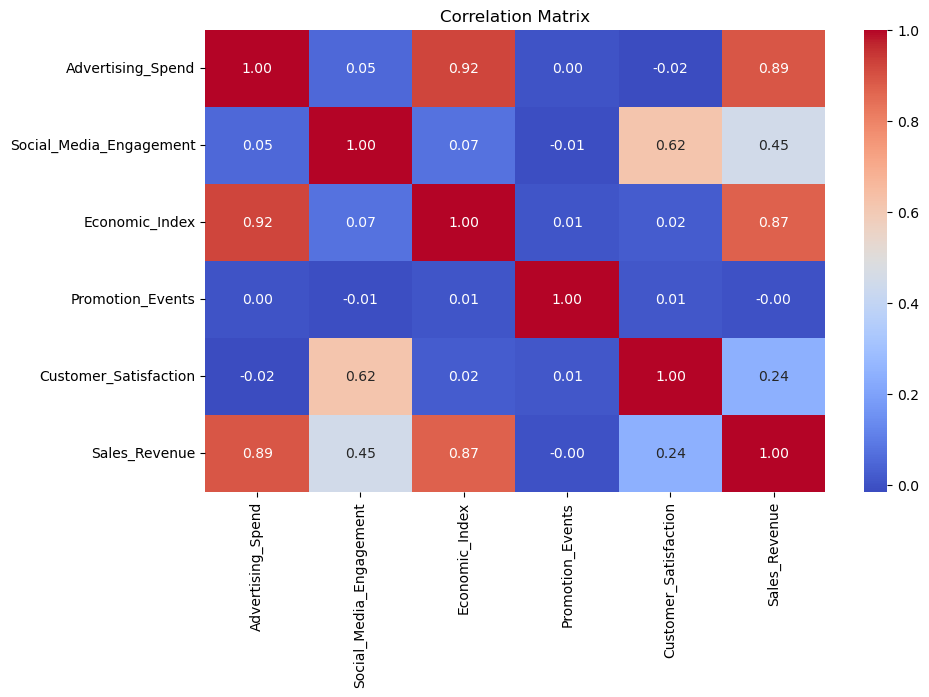

In [22]:
# Visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Function to calculate p-values for correlation matrix
def calculate_p_values(data):
    p_values = np.ones((data.shape[1], data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            _, p_values[i, j] = stats.pearsonr(data.iloc[:, i], data.iloc[:, j])
    return pd.DataFrame(p_values, columns=data.columns, index=data.columns)

# Assuming 'data' is your DataFrame
p_value_matrix = calculate_p_values(data)





In [29]:
p_value_matrix

,Advertising_Spend,Social_Media_Engagement,Economic_Index,Promotion_Events,Customer_Satisfaction,Sales_Revenue
Advertising_Spend,0.000000e+00,2.540516e-01,2.938906e-206,0.972328,7.317722e-01,3.184393e-173
Social_Media_Engagement,2.540516e-01,0.000000e+00,1.057401e-01,0.832040,1.960998e-53,6.534761e-26
Economic_Index,2.938906e-206,1.057401e-01,0.000000e+00,0.858505,6.239988e-01,3.994672e-155
Promotion_Events,9.723285e-01,8.320404e-01,8.585052e-01,0.000000,8.475821e-01,9.758842e-01
Customer_Satisfaction,7.317722e-01,1.960998e-53,6.239988e-01,0.847582,0.000000e+00,4.284195e-08
Sales_Revenue,3.184393e-173,6.534761e-26,3.994672e-155,0.975884,4.284195e-08,0.000000e+00


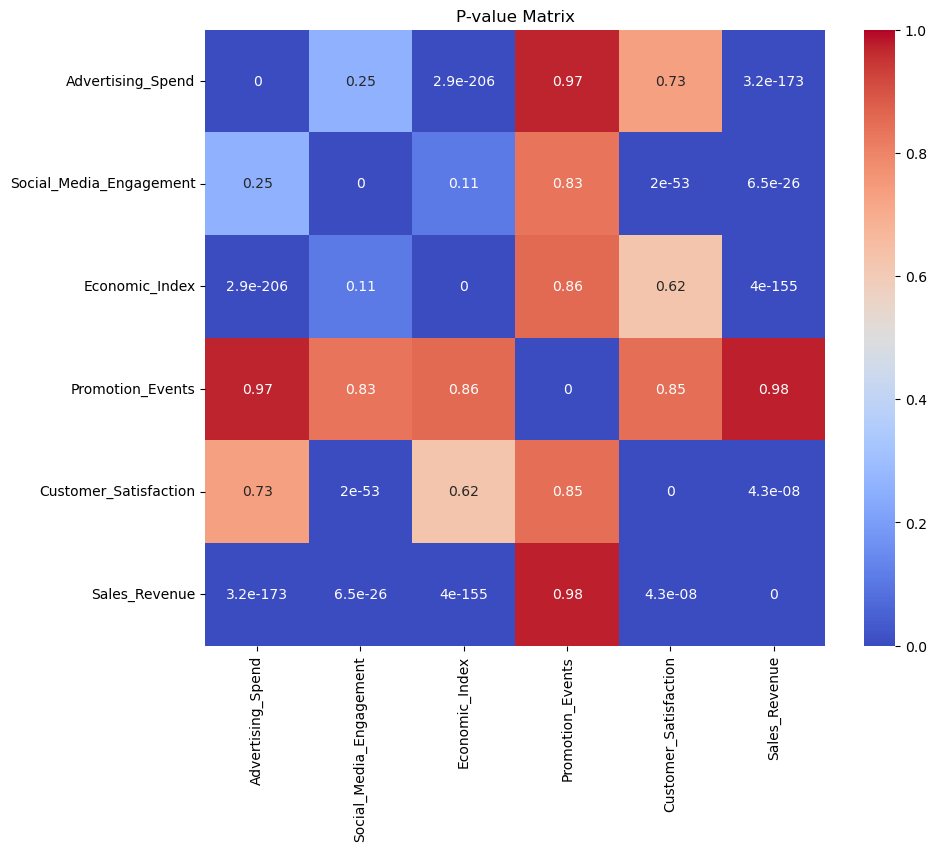

In [27]:
# Plotting the p-value matrix
plt.figure(figsize=(10, 8))
sns.heatmap(p_value_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("P-value Matrix")
plt.show()

# Predictive Analytics 

# 1. Simple linear Regression 

# A. Lets Chekc the Normality 

In [39]:
import pandas as pd
from scipy.stats import shapiro


# Select two variables
X = data['Advertising_Spend']
y = data['Sales_Revenue']

# Perform the Shapiro-Wilk test
shapiro_test_stat, p_value = shapiro(y)

# Check the result
if p_value > 0.05:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")


The data is not normally distributed.


# B. Plotting data on Bell curev Shape 

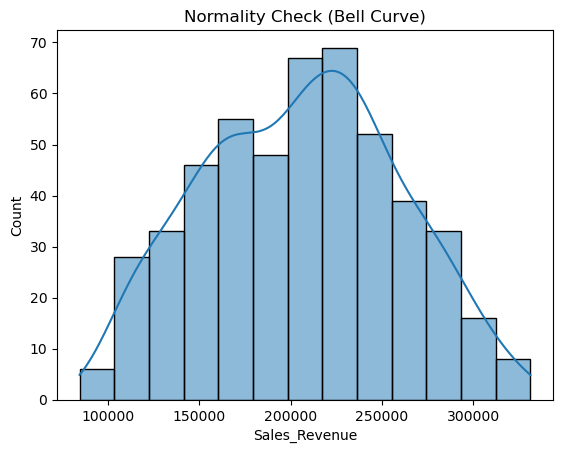

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram with a density curve
sns.histplot(y, kde=True)
plt.title("Normality Check (Bell Curve)")
plt.show()


# C. Scatter Plot 

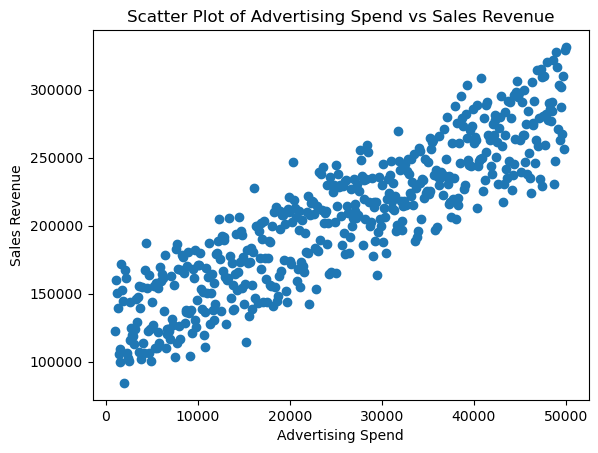

In [41]:
plt.scatter(X, y)
plt.title("Scatter Plot of Advertising Spend vs Sales Revenue")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales Revenue")
plt.show()


# D: OLS: Sinmple Linear Regression

                            OLS Regression Results                            
Dep. Variable:          Sales_Revenue   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1925.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          3.18e-173
Time:                        20:51:55   Log-Likelihood:                -5756.7
No. Observations:                 500   AIC:                         1.152e+04
Df Residuals:                     498   BIC:                         1.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                1.2e+05   2233.14

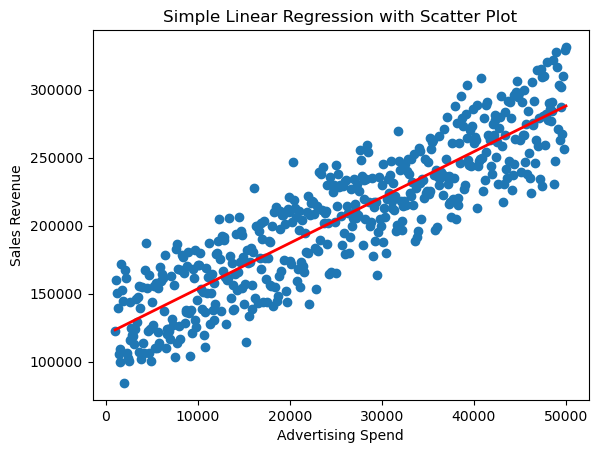

In [44]:
# Select two variables
X = data[['Advertising_Spend']]  # Independent variable
y = data['Sales_Revenue']         # Dependent variable

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
ols_model = sm.OLS(y, X).fit()

# Summary of the regression
print(ols_model.summary())

# Predictions
predictions = ols_model.predict(X)

# Plotting the scatter plot with regression line
plt.scatter(X['Advertising_Spend'], y)
plt.plot(X['Advertising_Spend'], predictions, color='red', linewidth=2)
plt.title("Simple Linear Regression with Scatter Plot")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales Revenue")
plt.show()

In [31]:
import pandas as pd
import statsmodels.api as sm

# Select significant independent variables and the dependent variable
X = data[['Advertising_Spend', 'Social_Media_Engagement', 'Economic_Index', 'Customer_Satisfaction']]
y = data['Sales_Revenue']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
ols_model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Sales_Revenue   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     3509.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:29:31   Log-Likelihood:                -5307.5
No. Observations:                 500   AIC:                         1.062e+04
Df Residuals:                     495   BIC:                         1.065e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7

# Machine Learning 

# A. Import necessary libraries 

In [32]:
# Step 1 Import all necessary libraries 

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# B. Specifiy varaibles 

In [33]:
# Step 2: Select the independent variables (IVs) and dependent variable (DV)
X = data[['Advertising_Spend', 'Social_Media_Engagement', 'Economic_Index']]
y = data['Sales_Revenue']

# C. # Divide Data into training and Testing 

In [34]:
# Step 3: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (400, 3) (400,)
Testing set shape: (100, 3) (100,)


# Train the Model 

In [35]:
# Create the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -3325.4950899354008
Coefficients: [   2.41552254  157.03097215 1040.3963878 ]


# Model Evaluation and Predictions 

Mean Squared Error (MSE): 83283583.66499068
R-squared (R²): 0.9733274464553824


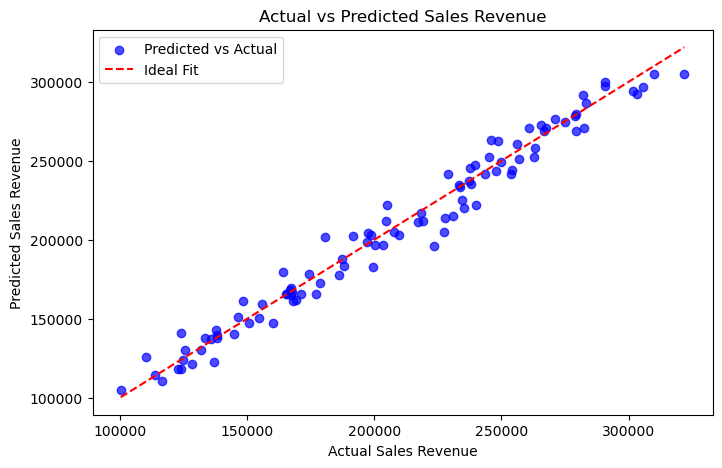

In [36]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Visualize Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Sales Revenue")
plt.ylabel("Predicted Sales Revenue")
plt.title("Actual vs Predicted Sales Revenue")
plt.legend()
plt.show()


# Predictions 

In [37]:
# Create a future dataset for prediction
future_data = pd.DataFrame({
    "Advertising_Spend": [500, 700, 900],
    "Social_Media_Engagement": [300, 400, 500],
    "Economic_Index": [120, 125, 130]
})

# Predict future sales revenue
future_predictions = model.predict(future_data)

# Add predictions to the future dataset
future_data['Predicted_Sales_Revenue'] = future_predictions

# Print the forecasted values
print(future_data)


   Advertising_Spend  Social_Media_Engagement  Economic_Index  \
0                500                      300             120   
1                700                      400             125   
2                900                      500             130   

   Predicted_Sales_Revenue  
0            169839.124360  
1            191227.308022  
2            212615.491683  


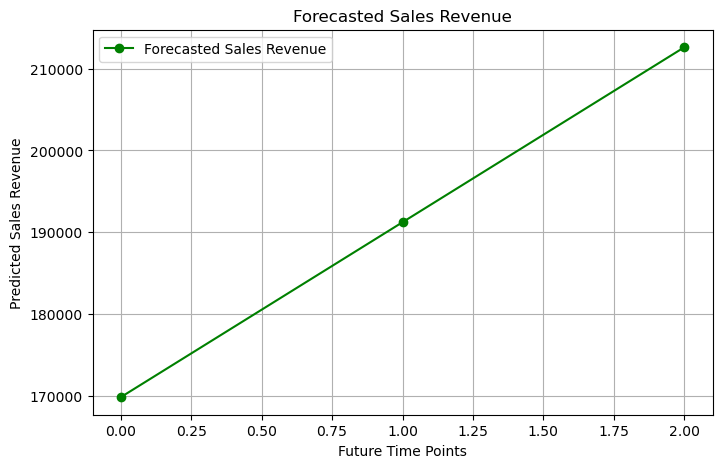

In [38]:
# Visualize forecasted sales revenue
plt.figure(figsize=(8, 5))
plt.plot(future_data.index, future_data['Predicted_Sales_Revenue'], marker='o', label="Forecasted Sales Revenue", color="green")
plt.title("Forecasted Sales Revenue")
plt.xlabel("Future Time Points")
plt.ylabel("Predicted Sales Revenue")
plt.grid()
plt.legend()
plt.show()


# from github 

In [52]:
import pickle
import pandas as pd

# Download the model from GitHub
model_url = "https://github.com/Kozminski-Network-Business-Analytics/test_model/raw/main/trained_linear_regression_model.pkl"
model_path = 'trained_linear_regression_model.pkl'

# Download and save the model
import requests

with open(model_path, 'wb') as file:
    response = requests.get(model_url)
    file.write(response.content)

print(f"Model saved from GitHub to {model_path}")


Model saved from GitHub to trained_linear_regression_model.pkl


In [56]:
import pickle
import pandas as pd

# Load the saved model
with open('trained_linear_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load the future data (it should only have 'Advertising_Spend')
future_data = pd.read_csv('future_data.csv')

# Select only the required column for prediction
future_data = future_data[['Advertising_Spend']]

# Make predictions
future_predictions = model.predict(future_data)

# Add predictions to the future dataset
future_data['Predicted_Sales_Revenue'] = future_predictions

# Print the forecasted values
print(future_data)


    Advertising_Spend  Predicted_Sales_Revenue
0                 402            121376.144573
1                 735            122494.529942
2                 570            121940.375030
3                 406            121389.578631
4                 371            121272.030620
..                ...                      ...
95                947            123206.535042
96                771            122615.436469
97                362            121241.803988
98                438            121497.051099
99                798            122706.116364

[100 rows x 2 columns]


C:\Users\AL-MALAK\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


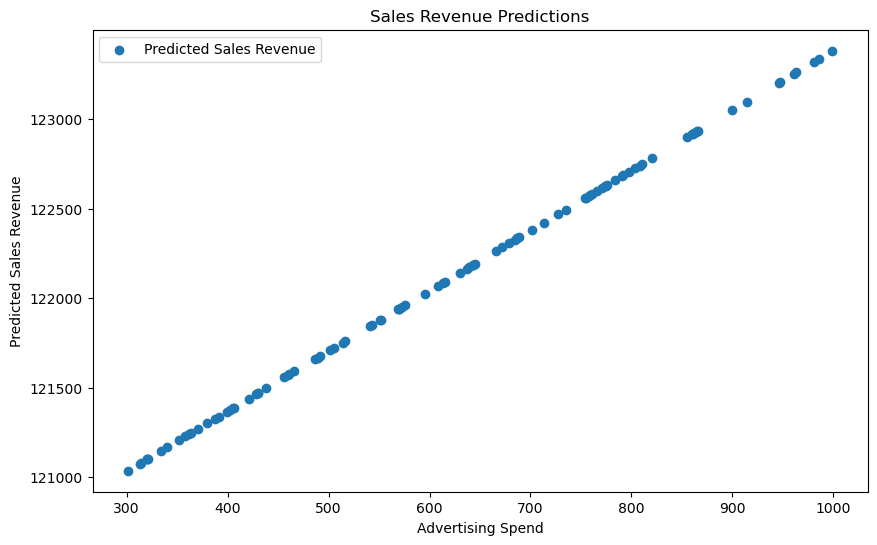

In [57]:
import matplotlib.pyplot as plt

# Plotting actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(future_data['Advertising_Spend'], future_data['Predicted_Sales_Revenue'], label='Predicted Sales Revenue')
plt.xlabel('Advertising Spend')
plt.ylabel('Predicted Sales Revenue')
plt.title('Sales Revenue Predictions')
plt.legend()
plt.show()
